# Actividad en clase Matplotlib

- Jorge Emiliano Pomar A01709338
- Fecha: 20 de mayo de 2025


In [52]:
import pandas as pd

df = pd.read_csv("multiTimeline.csv", skiprows=1)

df.head(5)

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


Usando este Dataset. de series de tiempo crea un ejemplo de cada tipo de gráfico visto:

- Línea
- Puntos (dispersión)
- Histograma
- Barras
- Pastel


In [58]:
print(df.columns)

Index(['Month', 'diet: (Worldwide)', 'gym: (Worldwide)',
       'finance: (Worldwide)'],
      dtype='object')


In [55]:
import matplotlib.pyplot as plt
import matplotlib as mpl


## Gráfico de líneas

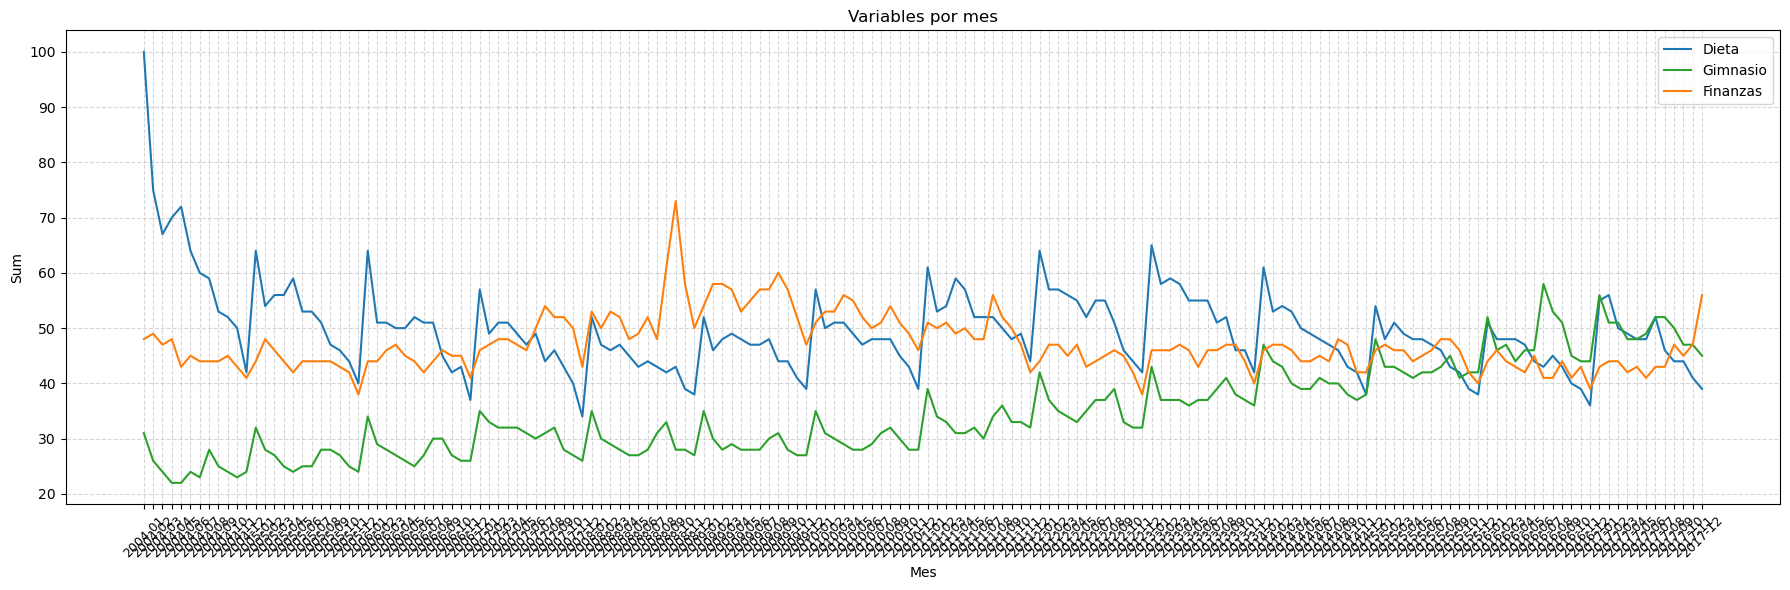

In [84]:
plt.figure(figsize=(18, 6))
plt.plot(df["Month"], df["diet: (Worldwide)"], color='tab:blue', label='Dieta')  # dividimos las variables para que sea más legible el gráfico, le agregamos distintos colores
plt.plot(df["Month"], df["gym: (Worldwide)"], color='tab:green', label='Gimnasio')
plt.plot(df["Month"], df["finance: (Worldwide)"], color='tab:orange', label='Finanzas')


plt.title("Variables por mes")
plt.xlabel("Mes")
plt.ylabel("Sum")
plt.xticks(rotation=45, fontsize=9) # Intenté hacer más legible las fechas poniendolas a 45 grados
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

## Dispersion

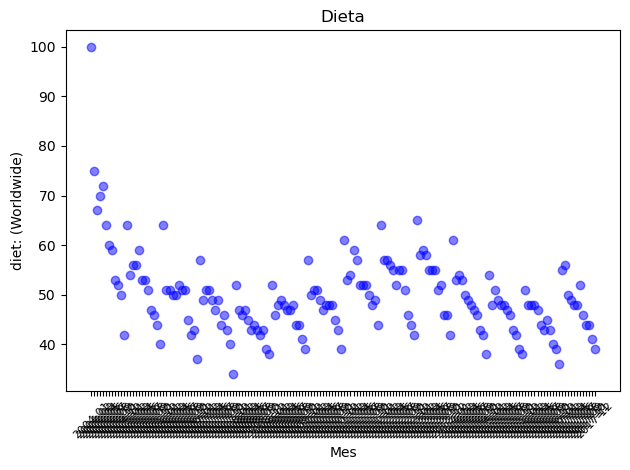

In [87]:
fig, ax = plt.subplots()
ax.scatter(df["Month"], df["diet: (Worldwide)"], c='b', alpha=0.5)
ax.set_title('Dieta')
ax.set_xlabel('Mes')
ax.set_ylabel('diet: (Worldwide)')
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

## Histograma

In [62]:
df.values.flatten()

array(['2004-01', 100, 31, 48, '2004-02', 75, 26, 49, '2004-03', 67, 24,
       47, '2004-04', 70, 22, 48, '2004-05', 72, 22, 43, '2004-06', 64,
       24, 45, '2004-07', 60, 23, 44, '2004-08', 59, 28, 44, '2004-09',
       53, 25, 44, '2004-10', 52, 24, 45, '2004-11', 50, 23, 43,
       '2004-12', 42, 24, 41, '2005-01', 64, 32, 44, '2005-02', 54, 28,
       48, '2005-03', 56, 27, 46, '2005-04', 56, 25, 44, '2005-05', 59,
       24, 42, '2005-06', 53, 25, 44, '2005-07', 53, 25, 44, '2005-08',
       51, 28, 44, '2005-09', 47, 28, 44, '2005-10', 46, 27, 43,
       '2005-11', 44, 25, 42, '2005-12', 40, 24, 38, '2006-01', 64, 34,
       44, '2006-02', 51, 29, 44, '2006-03', 51, 28, 46, '2006-04', 50,
       27, 47, '2006-05', 50, 26, 45, '2006-06', 52, 25, 44, '2006-07',
       51, 27, 42, '2006-08', 51, 30, 44, '2006-09', 45, 30, 46,
       '2006-10', 42, 27, 45, '2006-11', 43, 26, 45, '2006-12', 37, 26,
       41, '2007-01', 57, 35, 46, '2007-02', 49, 33, 47, '2007-03', 51,
       32, 4

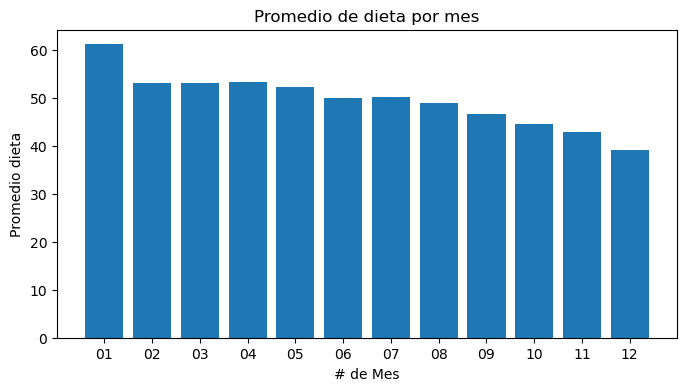

In [63]:
# Extraer el mes de la columna 'level_0'
df['Mes'] = df['Month'].str[5:7]

# Agrupar por año y sumar (o promediar) los valores de dieta
dieta_por_mes = df.groupby('Mes')['diet: (Worldwide)'].mean()

fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(dieta_por_mes.index, dieta_por_mes.values)
ax.set_title('Promedio de dieta por mes')
ax.set_xlabel('# de Mes')
ax.set_ylabel('Promedio dieta')
plt.show()

## Barras

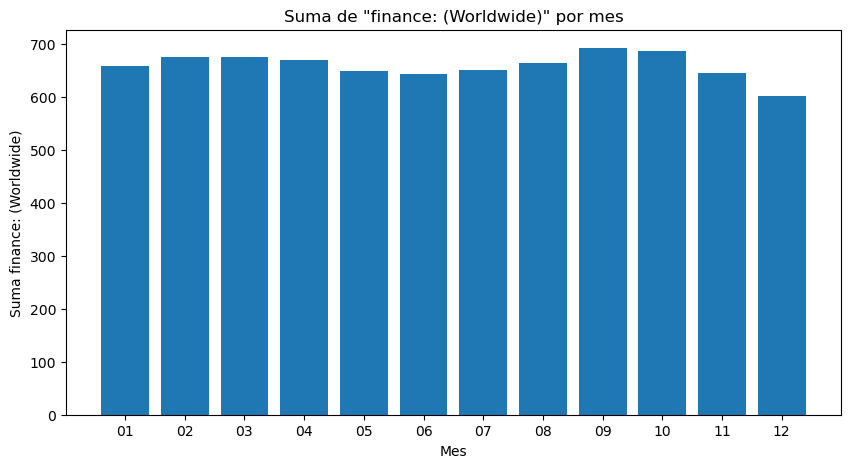

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))


# Agrupar por mes y sumar los valores de 'Category: All categories'
finance_por_mes = df.groupby('Mes')["finance: (Worldwide)"].sum()

ax.bar(finance_por_mes.index, finance_por_mes.values)
ax.set_title('Suma de "finance: (Worldwide)" por mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Suma finance: (Worldwide)')
plt.show()



## Pastel 

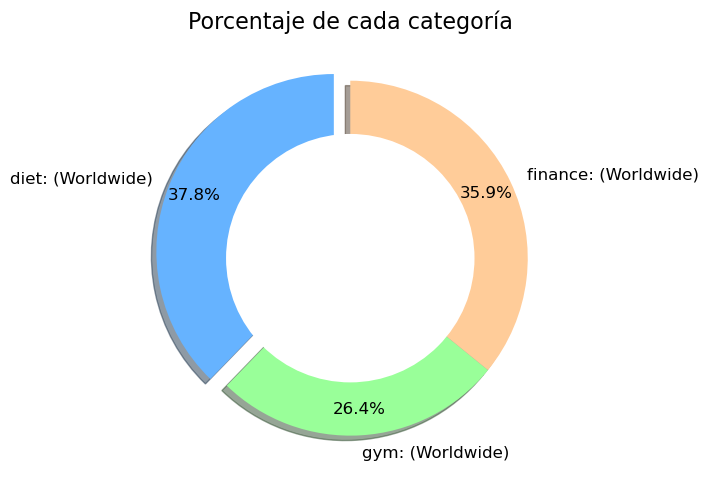

In [88]:
fig, ax = plt.subplots(figsize=(7, 7))
colors = ['#66b3ff', '#99ff99', '#ffcc99']

wedges, texts, autotexts = ax.pie(
    sums,
    labels=cols,
    autopct='%1.1f%%',
    explode=explode,
    shadow=True,
    colors=colors,
    startangle=90,
    pctdistance=0.85,
    textprops={'fontsize': 12}
)

# Dibujar un círculo en el centro para hacer un donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

ax.set_title('Porcentaje de cada categoría', fontsize=16)
plt.tight_layout()
plt.show()